In [1]:
# Import needed libraries 
import pandas as pd 
import os
from datetime import timedelta
import numpy as np 
from scipy.signal import argrelextrema
import alpaca_trade_api as tradeapi 
import matplotlib.pyplot as plt 
import matplotlib.dates as mpdates
from mplfinance.original_flavor import candlestick_ohlc
from dotenv import load_dotenv

In [2]:
#Load .env environment variables
from dotenv import load_dotenv
load_dotenv()

True

In [3]:

# Set Alpaca API key and secret
ALPACA_API_KEY = os.getenv("ALPACA_API_KEY")
ALPACA_SECRET_KEY = os.getenv("ALPACA_SECRET_KEY")
ALPACA_ENDPOINT_KEY = os.getenv("ALPACA_END_POINT")

#ensuring api keys are correct 
#print(os.getenv("APCA_API_KEY_ID"))
#print(os.getenv("APCA_API_SECRET_KEY"))
#print(os.getenv("ALPACA_ENDPOINT_KEY"))

# Create the Alpaca API object
api = tradeapi.REST(ALPACA_API_KEY, ALPACA_SECRET_KEY, api_version="v2",base_url= ALPACA_ENDPOINT_KEY)

In [4]:
# Set the ticker
ticker = "QQQ"

# Set timeframe to "1 Minute"
timeframe = "1Min"

# Set start and end datetimes of 3 years from Today
start_date = pd.Timestamp("2021-01-22", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2021-01-23", tz="America/New_York").isoformat()

# Get 3 years worth of historical data for TSLA
ticker_data = api.get_bars(
    ticker,
    timeframe,
    start=start_date,
    end=end_date,
).df

display(ticker_data.head())
display(ticker_data.tail())

,close,high,low,trade_count,open,volume,vwap
timestamp,,,,,,,
2021-01-22 09:00:00+00:00,325.21,325.21,325.21,2,325.21,116,325.216897
2021-01-22 09:01:00+00:00,325.15,325.21,325.15,8,325.21,584,325.180240
2021-01-22 09:02:00+00:00,325.17,325.17,325.17,4,325.17,202,325.170149
2021-01-22 09:03:00+00:00,325.11,325.15,325.09,5,325.09,1200,325.113333
2021-01-22 09:04:00+00:00,325.12,325.19,325.10,27,325.10,4518,325.152262


,close,high,low,trade_count,open,volume,vwap
timestamp,,,,,,,
2021-01-22 22:46:00+00:00,325.32,325.42,325.32,16,325.42,50379,325.419462
2021-01-22 22:51:00+00:00,325.40,325.40,325.30,33,325.33,6151,325.336472
2021-01-22 22:53:00+00:00,325.40,325.40,325.39,14,325.39,2488,325.396612
2021-01-22 22:54:00+00:00,325.40,325.40,325.40,11,325.40,936,325.397970
2021-01-22 22:58:00+00:00,325.40,325.40,325.40,10,325.40,1660,325.400000


In [5]:
#Clean up DF keep Open, High, Low, Close, Volume (OHLCV)
updated_ticker_data = ticker_data.drop(columns=['trade_count', 'vwap'])

#checking results
updated_ticker_data

,close,high,low,open,volume
timestamp,,,,,
2021-01-22 09:00:00+00:00,325.21,325.21,325.21,325.21,116
2021-01-22 09:01:00+00:00,325.15,325.21,325.15,325.21,584
2021-01-22 09:02:00+00:00,325.17,325.17,325.17,325.17,202
2021-01-22 09:03:00+00:00,325.11,325.15,325.09,325.09,1200
2021-01-22 09:04:00+00:00,325.12,325.19,325.10,325.10,4518
...,...,...,...,...,...
2021-01-22 22:46:00+00:00,325.32,325.42,325.32,325.42,50379
2021-01-22 22:51:00+00:00,325.40,325.40,325.30,325.33,6151
2021-01-22 22:53:00+00:00,325.40,325.40,325.39,325.39,2488


In [6]:
# Convert the index to datetime
updated_ticker_data.index = pd.to_datetime(updated_ticker_data.index)

In [7]:
# Isolate closing prices to use for plotting stock data
close = updated_ticker_data['close']

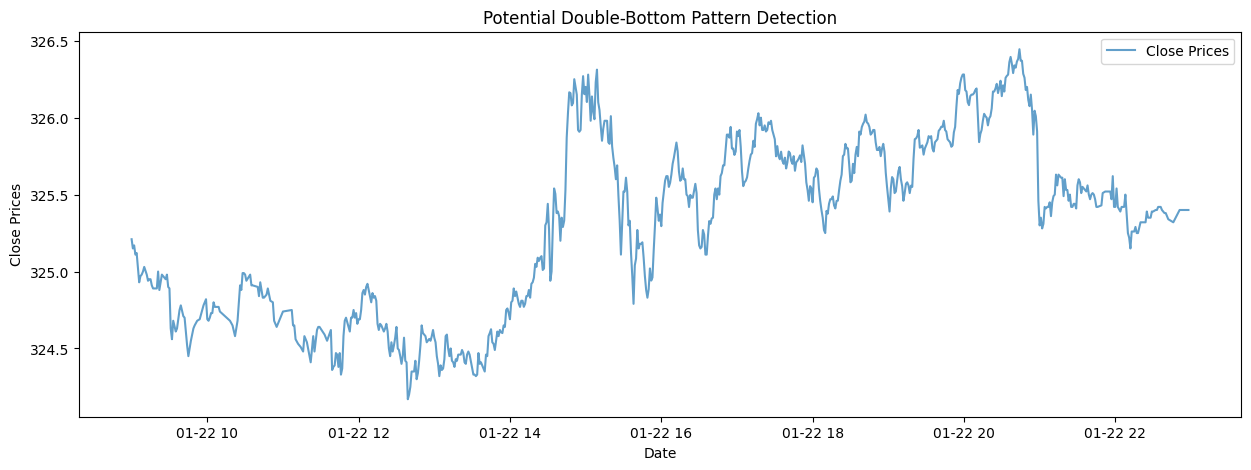

[325.12694955 325.12542498 325.12034814 325.1122238  325.10151526
 325.08864665 325.07400522 325.05794345 325.04078113 325.02280732
 325.00428228 324.98543921 324.96648605 324.94760709 324.92896458
 324.91070022 324.89293663 324.87577868 324.85931484 324.84361842
 324.82874874 324.81475227 324.80166371 324.78950699 324.77829625
 324.76803675 324.75872573 324.75035324 324.74290287 324.73635254
 324.73067513 324.72583917 324.7218094  324.71854734 324.71601187
 324.71415966 324.71294566 324.71232352 324.71224601 324.71266534
 324.71353354 324.71480275 324.71642549 324.71835496 324.72054522
 324.72295145 324.72553013 324.72823916 324.73103808 324.73388815
 324.73675248 324.73959614 324.74238619 324.7450918  324.74768427
 324.75013707 324.75242585 324.7545285  324.75642508 324.75809785
 324.75953128 324.76071194 324.76162855 324.76227186 324.76263466
 324.76271169 324.76249957 324.76199674 324.76120342 324.76012147
 324.75875434 324.757107   324.75518584 324.75299855 324.75055409
 324.74786

c:\Users\JamesDavidson\Anaconda3\envs\mlenv\lib\site-packages\numpy\lib\polynomial.py:667: RuntimeWarning: overflow encountered in multiply
  scale = NX.sqrt((lhs*lhs).sum(axis=0))
c:\Users\JamesDavidson\Anaconda3\envs\mlenv\lib\site-packages\numpy\core\_methods.py:49: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
C:\Users\JamesDavidson\AppData\Local\Temp\ipykernel_5644\2708388708.py:23: RankWarning: Polyfit may be poorly conditioned
  polynomial_coefficients = np.polyfit(x_data, updated_ticker_data['close'][:min_length], polynomial_degree)


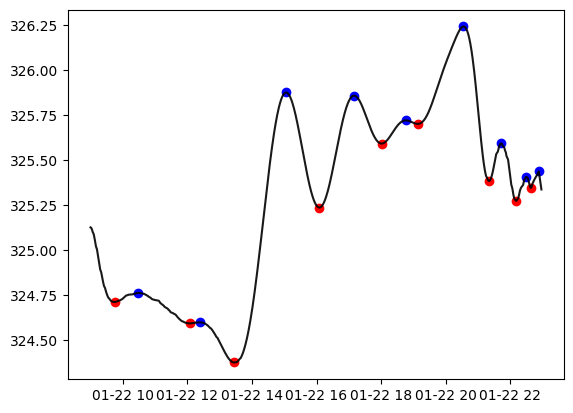

In [8]:
# Find local minima indices using scipy's argrelextrema
#minima_indices = argrelextrema(lows.values, np.less, order=5)[0]

# Plot the stock data and identified minima
plt.figure(figsize=(15, 5))

# Establishes dimensions for x-axis
min_length = min(len(updated_ticker_data.index), len(updated_ticker_data['close']))

plt.plot(updated_ticker_data.index, close, label='Close Prices', alpha=0.7)

#plt.scatter(stock_data.index[minima_indices], lows.iloc[minima_indices], color='red', label='Local Minima')
plt.title('Potential Double-Bottom Pattern Detection')
plt.xlabel('Date')
plt.ylabel('Close Prices')
plt.legend()
plt.show()

# Polynomial Fit

x_data = np.arange(min_length)
polynomial_degree = 100  # Adjust as needed
polynomial_coefficients = np.polyfit(x_data, updated_ticker_data['close'][:min_length], polynomial_degree)
y_polynomial = np.polyval(polynomial_coefficients, x_data)

#print(y_polynomial)

# Identify Local Extrema for polynomial fit data
local_poly_minima = argrelextrema(y_polynomial, np.less, order=5)[0]
local_poly_maxima = argrelextrema(y_polynomial, np.greater, order=5)[0]
# local_poly_minima_df = pd.DataFrame(local_poly_minima)
# local_poly_maxima_df = pd.DataFrame(local_poly_maxima)

# Plot polynomial fit
plt.plot(updated_ticker_data.index[:min_length], y_polynomial, '-', markersize=1.0, color='black', alpha=0.9, label='Polynomial Fit')

# Plot red dots at local minima
#plt.scatter(stock_data.index, local_poly_minima, color='red', label='Local Minima')
plt.scatter(updated_ticker_data.index[local_poly_minima], y_polynomial[local_poly_minima], color='red', label='Local Minima')
plt.scatter(updated_ticker_data.index[local_poly_maxima],y_polynomial[local_poly_maxima], color="blue", label = "Local Maxima")

# # # Define parameters for double-bottom pattern detection
# y_delta = 0.03  # Adjust as needed
# threshold = lows.min() * 1.15

# # Identify potential double-bottom patterns
# # suspected_bottoms = []
# # suspected_tops = []
# # for index in local_poly_minima_df:
# #    avg_price = lows.iloc[max(0, index - 5): min(len(lows), index + 5)].mean()
# #    if lows.iloc[index] < threshold:
# #        suspected_bottoms.append(index)

# # # Plot the identified double-bottom patterns
# # plt.figure(figsize=(15, 5))
# # plt.plot(stock_data.index, lows, label='Low Prices', alpha=0.7)
# # plt.scatter(stock_data.index[suspected_bottoms], lows.iloc[suspected_bottoms], color='green', label='Double Bottoms')
# # plt.axhline(threshold, linestyle='--', color='blue', label='Threshold')
# # plt.title('Identified Double-Bottom Patterns')
# # plt.xlabel('Date')
# # plt.ylabel('Low Prices')
# # plt.legend()
# # plt.show()

In [9]:
display(x_data)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [10]:
display(y_polynomial)

array([325.12694955, 325.12542498, 325.12034814, 325.1122238 ,
       325.10151526, 325.08864665, 325.07400522, 325.05794345,
       325.04078113, 325.02280732, 325.00428228, 324.98543921,
       324.96648605, 324.94760709, 324.92896458, 324.91070022,
       324.89293663, 324.87577868, 324.85931484, 324.84361842,
       324.82874874, 324.81475227, 324.80166371, 324.78950699,
       324.77829625, 324.76803675, 324.75872573, 324.75035324,
       324.74290287, 324.73635254, 324.73067513, 324.72583917,
       324.7218094 , 324.71854734, 324.71601187, 324.71415966,
       324.71294566, 324.71232352, 324.71224601, 324.71266534,
       324.71353354, 324.71480275, 324.71642549, 324.71835496,
       324.72054522, 324.72295145, 324.72553013, 324.72823916,
       324.73103808, 324.73388815, 324.73675248, 324.73959614,
       324.74238619, 324.7450918 , 324.74768427, 324.75013707,
       324.75242585, 324.7545285 , 324.75642508, 324.75809785,
       324.75953128, 324.76071194, 324.76162855, 324.76

In [11]:
y_polynomial_df = pd.DataFrame(y_polynomial)
y_polynomial_df.columns = ['Closing Prices']
y_polynomial_df

,Closing Prices
0,325.126950
1,325.125425
2,325.120348
3,325.112224
4,325.101515
...,...
740,325.398751
741,325.423845
742,325.437619
743,325.419652
